In [ ]:
### Ques 1 -- Read the Titanic dataset and import all required libraries.

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import numpy as np

In [ ]:
tc =pd.read_csv('Titanic.csv')

In [ ]:
tc

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1307,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1308,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1309,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1310,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [ ]:
tc.isna().sum()

Unnamed: 0      0
Name            0
PClass          0
Age           556
Sex             0
Survived        0
SexCode         0
dtype: int64

In [ ]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1312 non-null   int64  
 1   Name        1312 non-null   object 
 2   PClass      1312 non-null   object 
 3   Age         756 non-null    float64
 4   Sex         1312 non-null   object 
 5   Survived    1312 non-null   int64  
 6   SexCode     1312 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [ ]:
tc['Class'] = tc['PClass'].str[0]
tc

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode,Class
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,1
...,...,...,...,...,...,...,...,...
1307,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0,3
1308,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0,3
1309,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0,3
1310,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0,3


In [ ]:
tc.fillna(tc.mean(), inplace=True)


In [ ]:
tc['Age'] = tc['Age'].apply(np.int64)

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode,Class
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,1
...,...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0,3
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0,3
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0,3
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0,3


In [ ]:
### Ques 2 -- Find out in the target column (survival) what is the respective count of values

In [ ]:
tc.groupby('Survived').count()

,Unnamed: 0,Name,PClass,Age,Sex,SexCode,Class
Survived,,,,,,,
0,862,862,862,862,862,862,862
1,450,450,450,450,450,450,450


In [ ]:
### Ques 3 -- Confirm through a chart that Women more likely survivied than Men

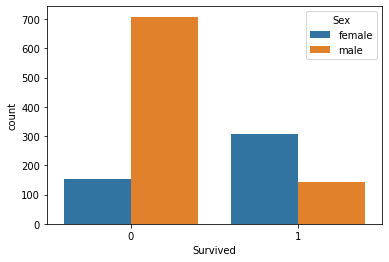

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=tc)

In [ ]:
### Ques 4 -- Confirm through a chart that a person aboarded with more than 2 siblings or spouse more likely survive

In [ ]:
Data not given

In [ ]:
### Ques 5 -- Write code to convert categorical columns to equivalent dummy variables

In [ ]:
tc =pd.get_dummies(tc,columns=['Sex'],drop_first=True)
tc

,Unnamed: 0,Name,PClass,Age,Survived,SexCode,Class,Sex_male
0,1,"Allen, Miss Elisabeth Walton",1st,29,1,1,1,0
1,2,"Allison, Miss Helen Loraine",1st,2,0,1,1,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30,0,0,1,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25,0,1,1,0
4,5,"Allison, Master Hudson Trevor",1st,0,1,0,1,1
...,...,...,...,...,...,...,...,...
1307,1309,"Zakarian, Mr Artun",3rd,27,0,0,3,1
1308,1310,"Zakarian, Mr Maprieder",3rd,26,0,0,3,1
1309,1311,"Zenni, Mr Philip",3rd,22,0,0,3,1
1310,1312,"Lievens, Mr Rene",3rd,24,0,0,3,1


In [ ]:
tc.columns

Index(['Unnamed: 0', 'Name', 'PClass', 'Age', 'Survived', 'SexCode', 'Class',
       'Sex_male'],
      dtype='object')

Removing unwanted columns

In [ ]:
cols =['Unnamed: 0', 'Name', 'PClass','SexCode']

In [ ]:
tc.drop(cols,axis=1,inplace=True)
tc

,Age,Survived,Class,Sex_male
0,29,1,1,0
1,2,0,1,0
2,30,0,1,1
3,25,0,1,0
4,0,1,1,1
...,...,...,...,...
1307,27,0,3,1
1308,26,0,3,1
1309,22,0,3,1
1310,24,0,3,1


In [ ]:
tc.head(458)

,Age,Survived,Class,Sex_male
0,29,1,1,0
1,2,0,1,0
2,30,0,1,1
3,25,0,1,0
4,0,1,1,1
...,...,...,...,...
453,30,0,2,0
454,33,0,2,1
455,17,1,2,0
456,30,1,2,0


In [ ]:
tc.drop(456)

,Age,Survived,Class,Sex_male
0,29,1,1,0
1,2,0,1,0
2,30,0,1,1
3,25,0,1,0
4,0,1,1,1
...,...,...,...,...
1308,27,0,3,1
1309,26,0,3,1
1310,22,0,3,1
1311,24,0,3,1


In [ ]:
pd.to_numeric(tc['Class'])

0       1
1       1
2       1
3       1
4       1
       ..
1307    3
1308    3
1309    3
1310    3
1311    3
Name: Class, Length: 1312, dtype: int64

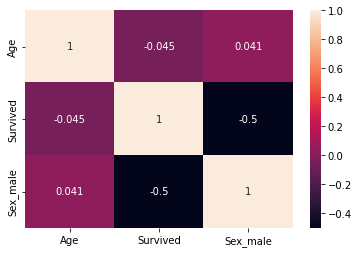

In [ ]:
sns.heatmap(tc.corr(),annot=True)

Logistic Model

In [ ]:
X = tc.drop("Survived",axis=1)
y = tc["Survived"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
logm = LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
### Ques 6 -- Perform predictions on the Test dataset

In [ ]:
y_pred = logm.predict(X_test)

In [ ]:
### Ques 7 -- Create the confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[242,  18],
       [ 51,  83]])

In [ ]:
### Ques 8 -- Find the accuracy of your model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       260
           1       0.82      0.62      0.71       134

    accuracy                           0.82       394
   macro avg       0.82      0.78      0.79       394
weighted avg       0.82      0.82      0.82       394

